# Домашнее задание №6. 
# Методы оптимизации в машинном обучении.
### Выполнила: Леонтьева Ксения Андреевна
### Группа: НПМбд-01-19

In [84]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import oracles
import optimization
import presubmit_tests
from plot_trajectory_2d import plot_levels, plot_trajectory
from sklearn.datasets import load_svmlight_file

Проверка правильности реализации подсчета градиента и гессиана логистического
оракула с помощью реализованных функций. Для этого необходимо сгенерировать небольшую модельную выборку (матрицу A и вектор b) и сравнить значения, выдаваемые методами grad и hess, с соответствующими разностными аппроксимациями в некоторой точке x.

In [91]:
A = np.array([[5, 1], [6, -2], [0, 3]])
b = np.array([2, 1, -1])
regcoef = 2
oracle = oracles.create_log_reg_oracle(A, b, regcoef)
f = lambda x: oracle.func(x)
x = np.array([1, 2])
print('Градиент через grad:', oracle.grad(x))
print('Градиент через grad_finite_diff:', oracles.grad_finite_diff(f, x))
print('Гессиан через hess:')
print(oracle.hess(x))
print('Гессиан через hess_finite_diff')
print(oracles.hess_finite_diff(f, x))

Градиент через grad: [1.76159138 5.07699544]
Градиент через grad_finite_diff: [1.76159141 5.07699536]
Гессиан через hess:
[[ 3.25992995 -0.41997296]
 [-0.41997296  2.14739125]]
Гессиан через hess_finite_diff
[[ 3.2599079  -0.41994852]
 [-0.41994852  2.14738449]]


Значения почти совпадают.

Проверка автоматических предварительных тестов presubmit_tests.py.

In [92]:
presubmit_tests.test_python3()
presubmit_tests.test_QuadraticOracle()
presubmit_tests.test_log_reg_usual()
presubmit_tests.test_log_reg_oracle_calls()
presubmit_tests.test_grad_finite_diff_1()
presubmit_tests.test_grad_finite_diff_2()
presubmit_tests.test_hess_finite_diff_1()
presubmit_tests.test_hess_finite_diff_2()
presubmit_tests.test_line_search()
presubmit_tests.test_gd_basic()
presubmit_tests.test_newton_basic()
presubmit_tests.test_newton_1d()
presubmit_tests.test_newton_fail()

Done!
Done!
Done!
Done!


Тесты прошли успешно.

### Эксперимент: Траектория градиентного спуска на квадратичной функции.

Проанализировать как отличается поведение метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага (константная стратегия, Армихо, Вульф).

Прим.: Число обусловленности матрицы показывает насколько матрица близка к матрице неполного ранга (для квадратных матриц - к вырожденности).

In [18]:
methods = [{'method': 'Constant', 'c': 0.1}, {'method': 'Armijo', 'alpha_0': 10.0, 'c1':0.5}, {"method":'Wolfe', 'c1':1e-4, 'c2':0.5, 'alpha_0':2.0}]
x_0 = np.array([[3, 1.5], [1, 1], [-2, 0]])

A1 = np.array([[4, -1], [-1, 3]])
b1 = np.zeros(2)

A2 = np.array([[1, -1], [-1, 2]])
b2 = np.array([3, -2])

A3 = np.array([[1, 3], [3, 8]])
b3 = np.zeros(2)

In [19]:
def graph(methods, x_0, A, b):
    
    print('cond =', np.linalg.norm(A) * np.linalg.norm(np.linalg.inv(A)))
    fig, ax = plt.subplots(len(methods), len(x_0), figsize = (40,40))
    oracle = oracles.QuadraticOracle(A, b)
    for i in range(len(methods)):
        for j in range(len(x_0)):
            [x_star, msg, history] = optimization.gradient_descent(oracle, x_0[j], line_search_options = methods[i], trace=True)
            plot_levels(oracle.func, ax[i][j])
            plot_trajectory(oracle.func, history['x'], ax[i][j])
            ax[i][j].set_title('Метод: ' + str(methods[i]) + '\nНачальная точка = ' + str(x_0[j]) + '\nЧисло итераций = ' + str(len(history['x'])), fontsize = 16)

cond = 2.4545454545454546


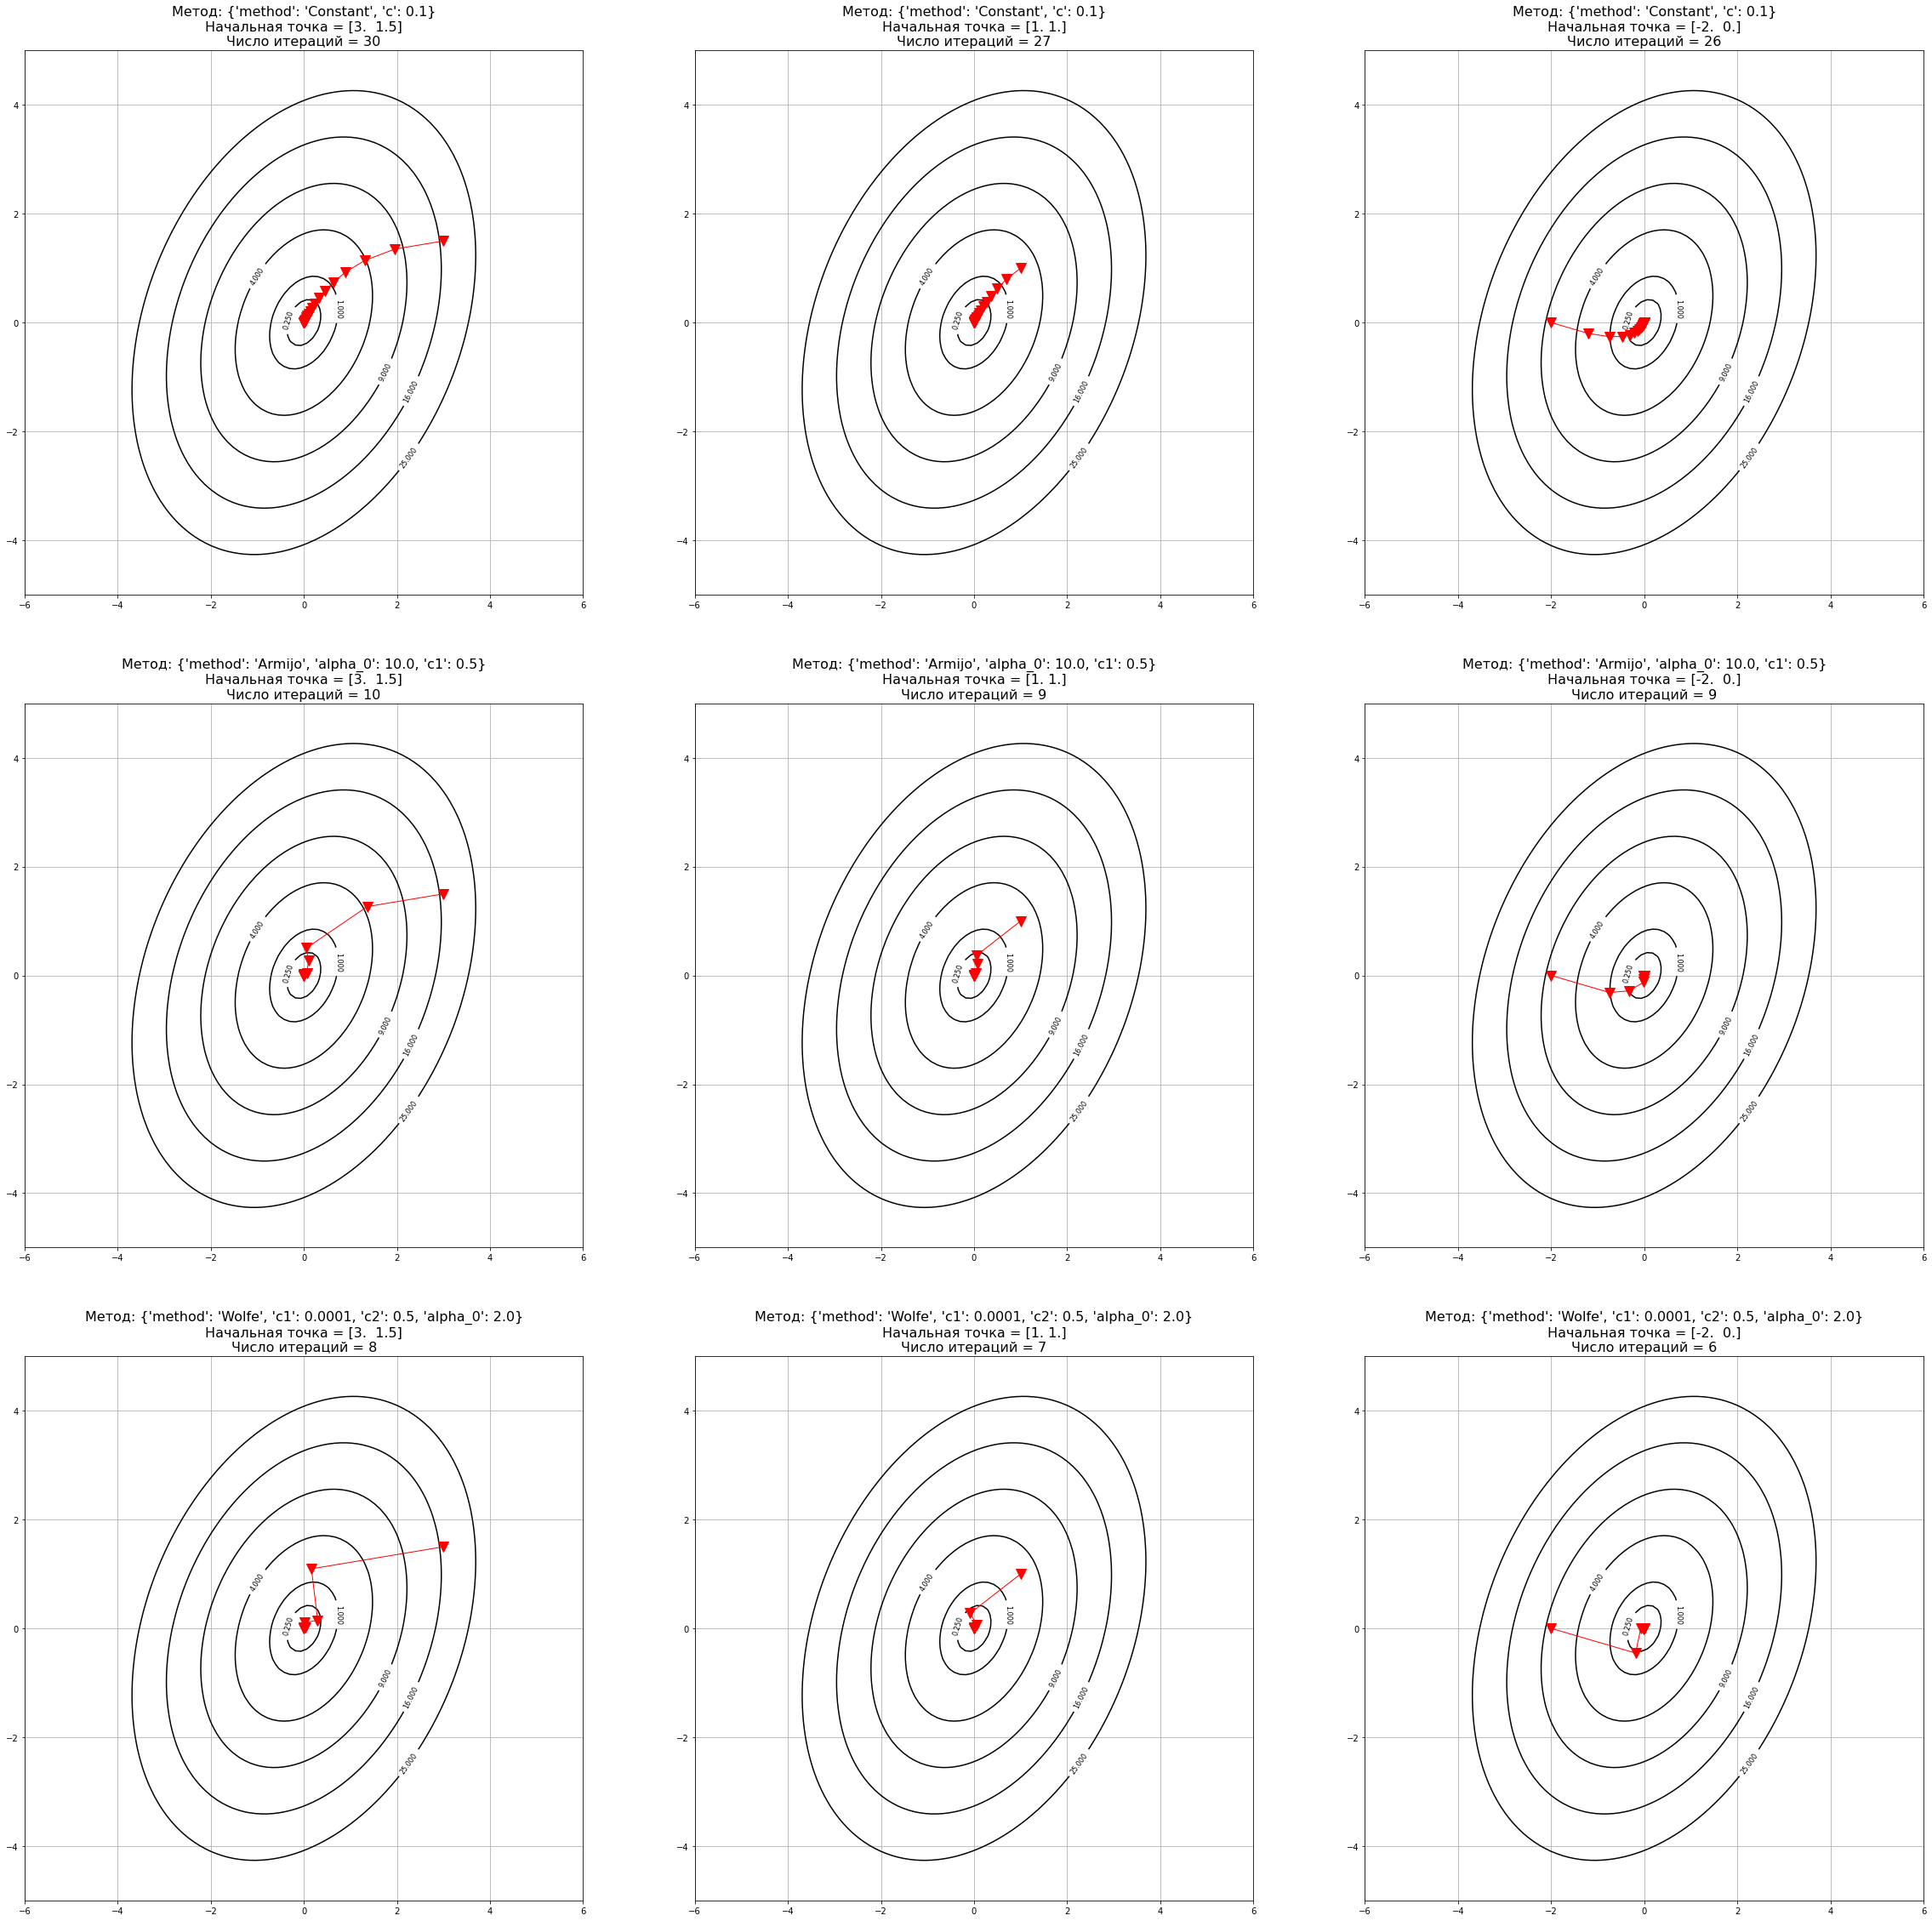

In [20]:
graph(methods, x_0, A1, b1)

cond = 7.000000000000001


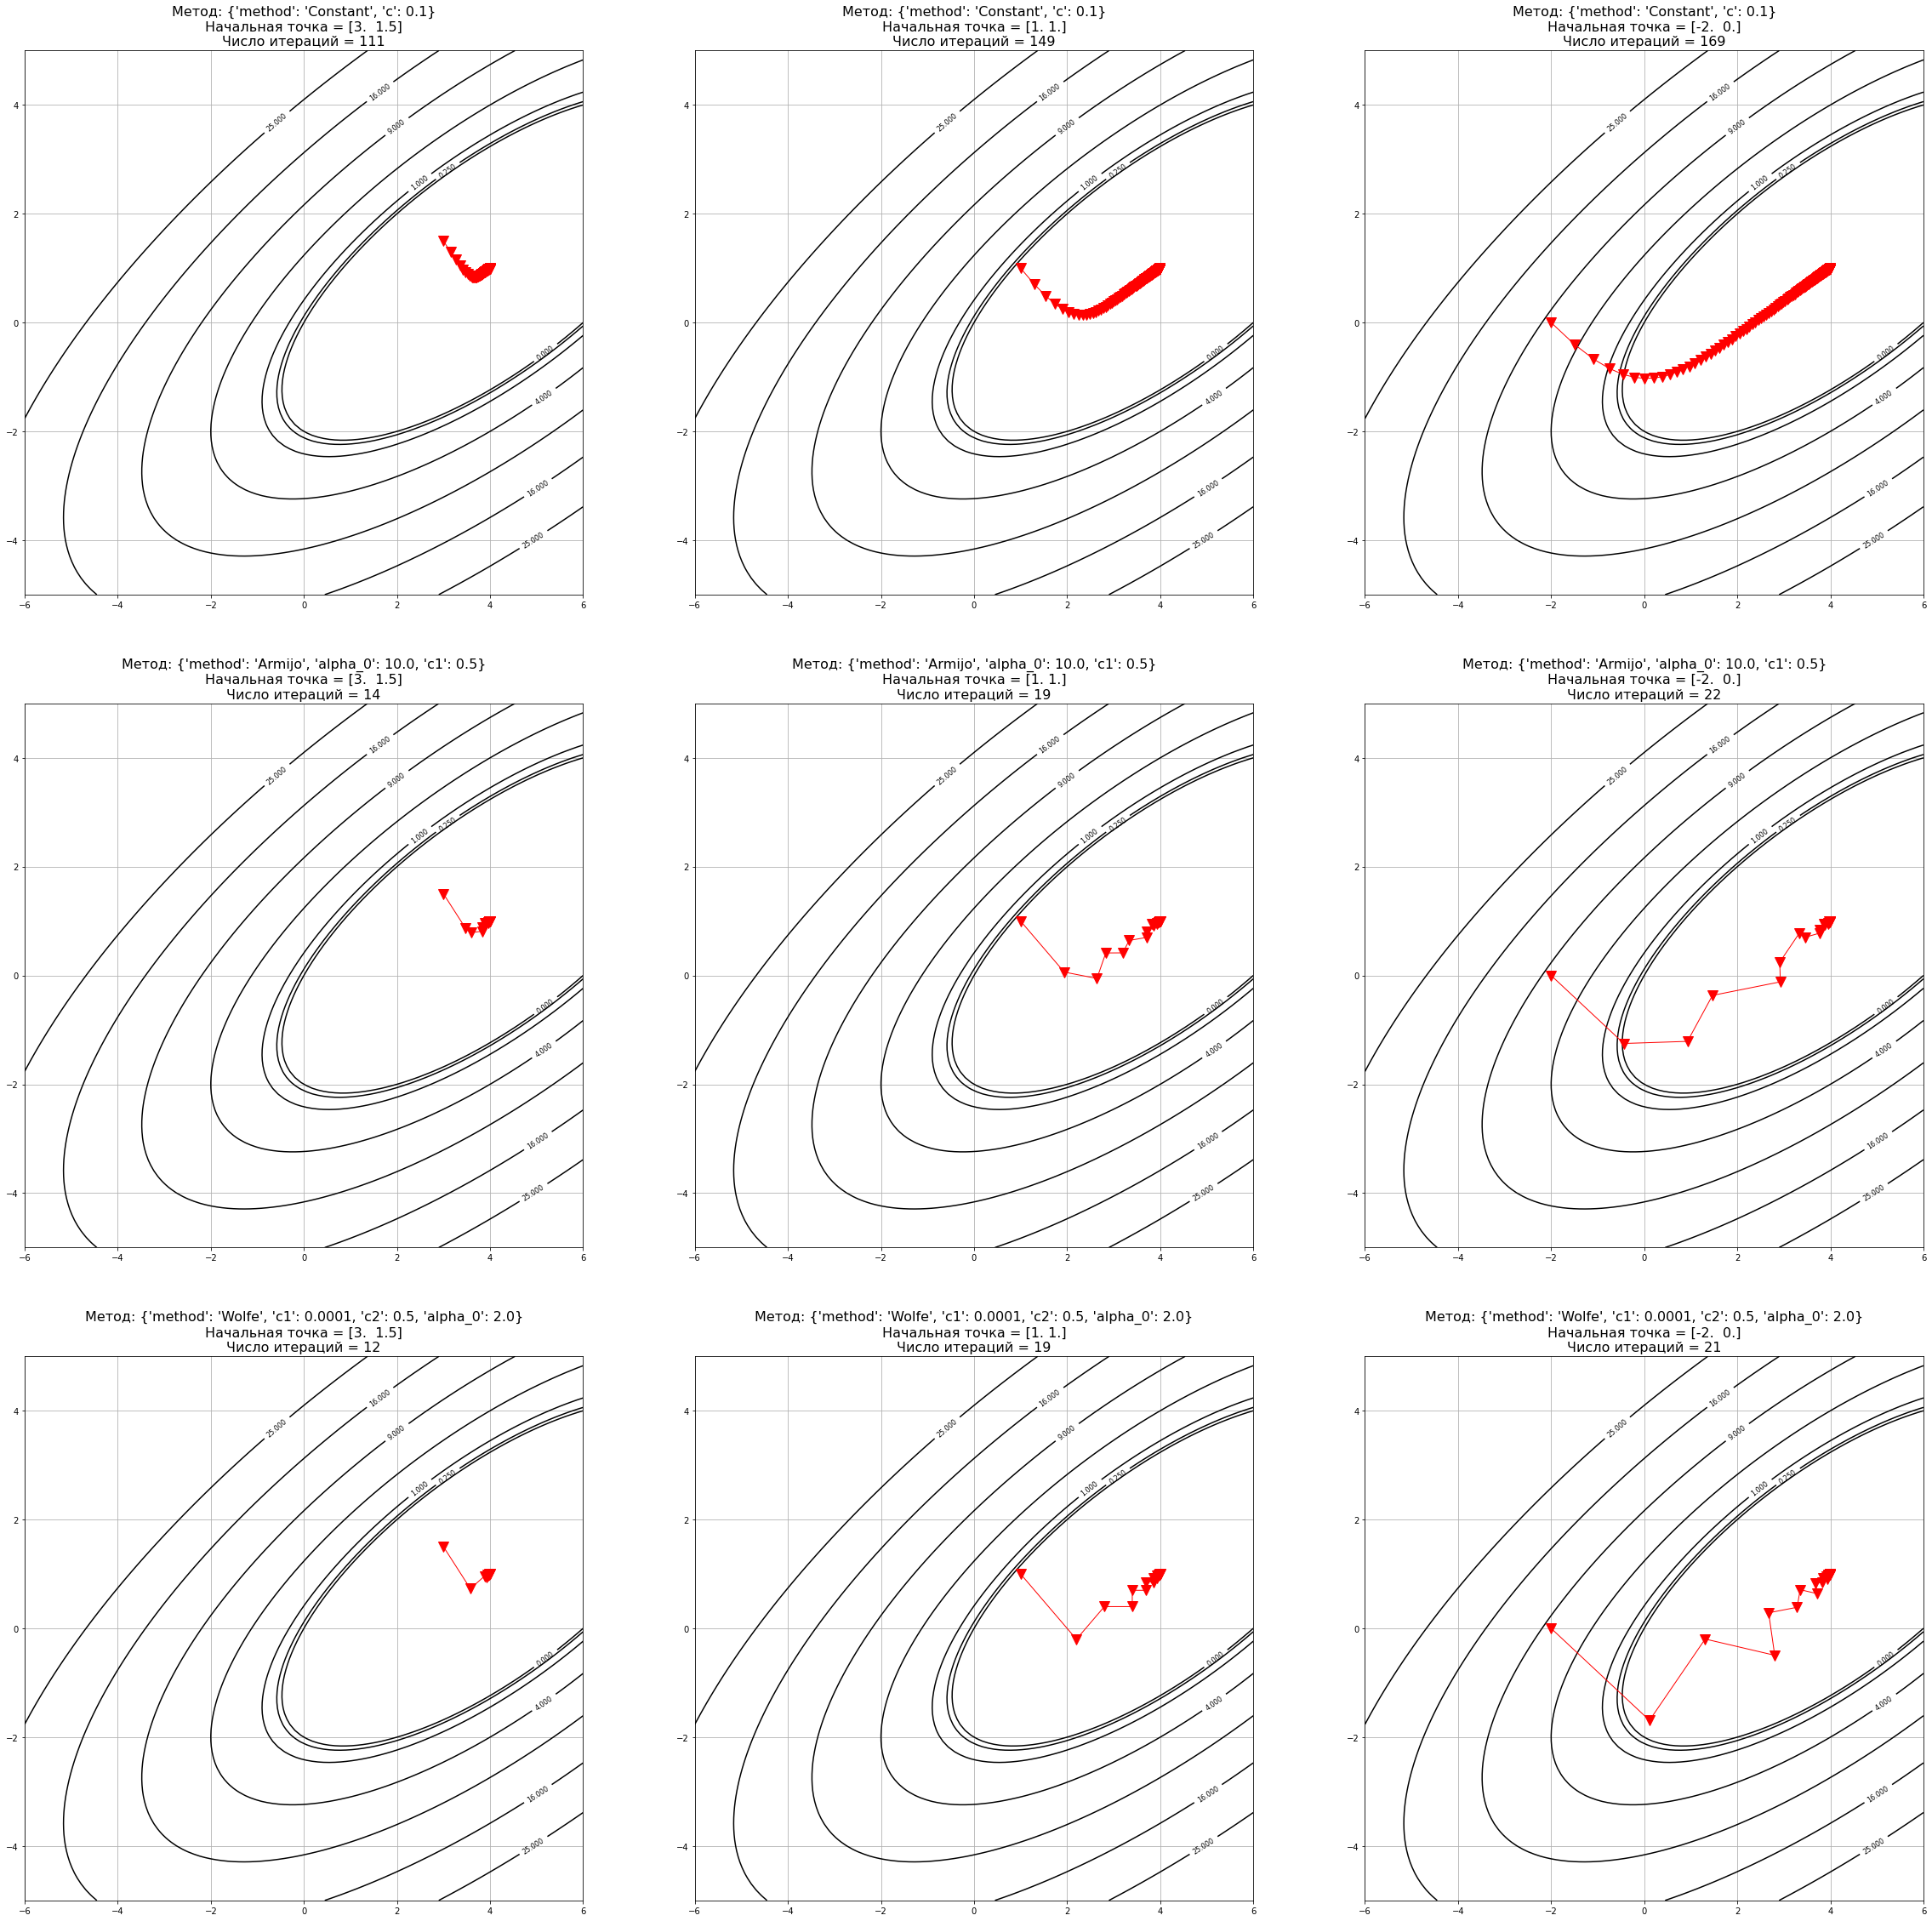

In [21]:
graph(methods, x_0, A2, b2)

cond = 82.99999999999997


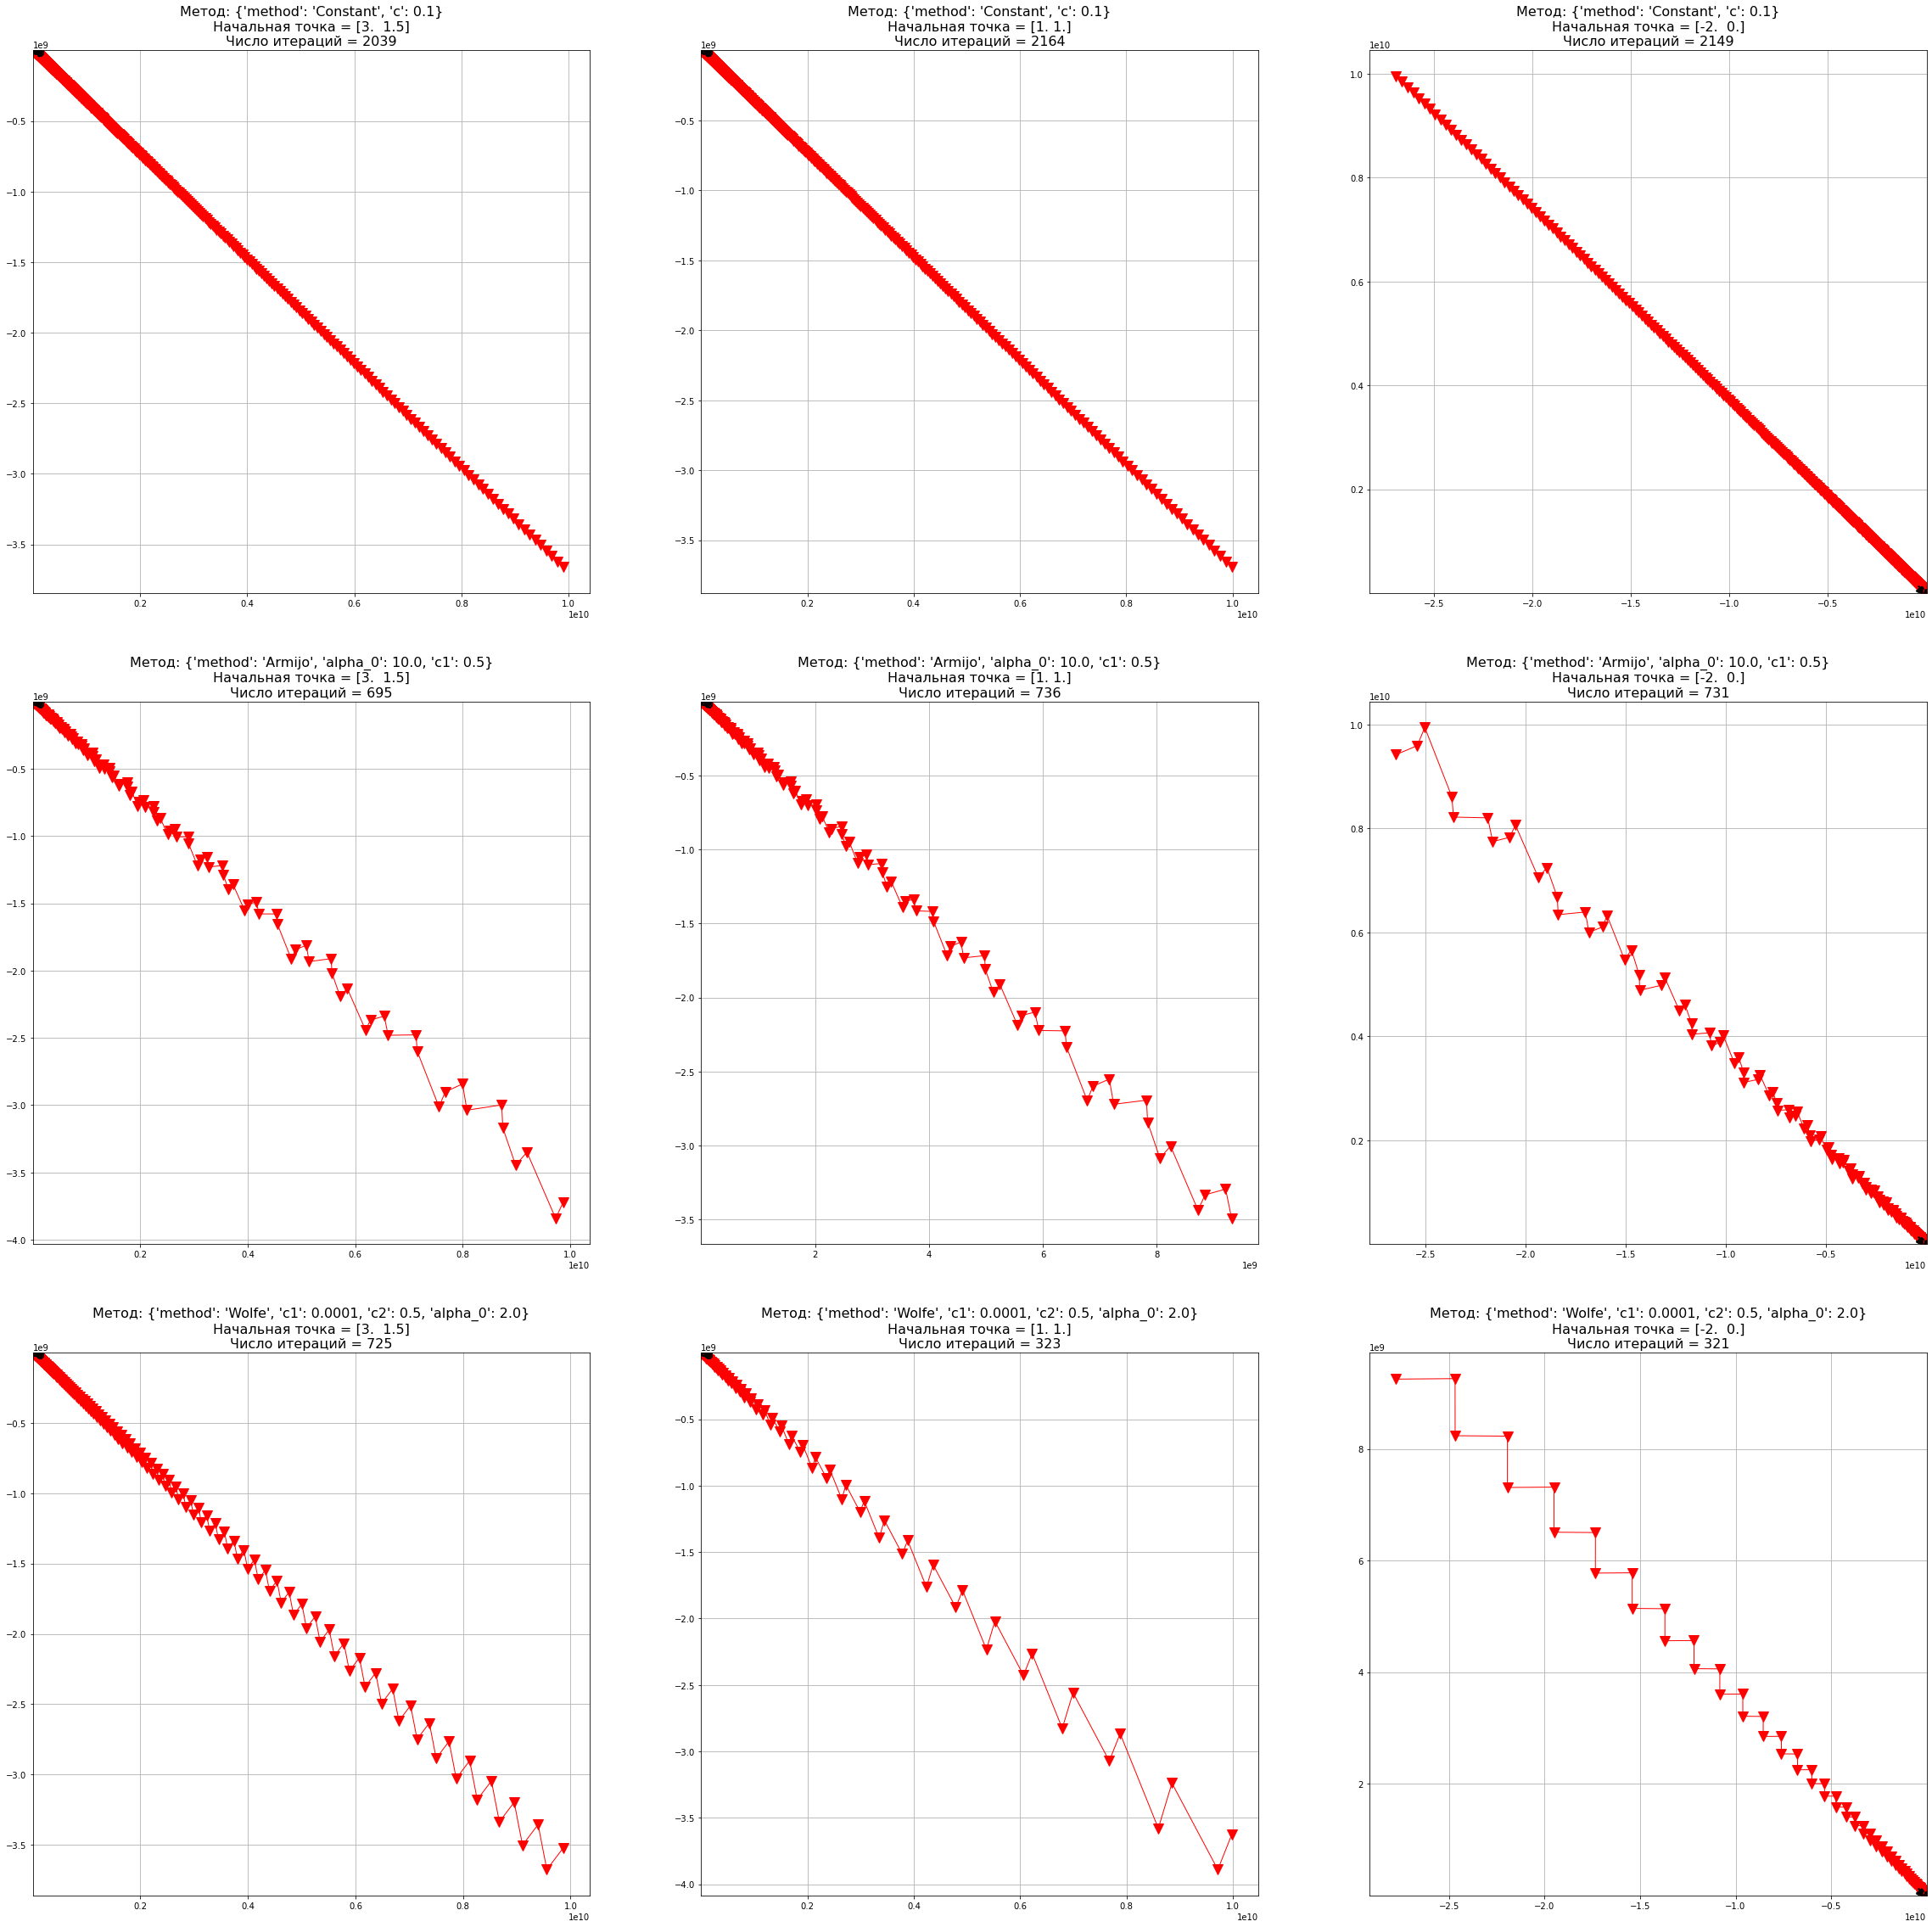

In [22]:
graph(methods, x_0, A3, b3)

### Выводы:

* Чем хуже обусловлена матрица, тем "радиусы" уровней больше.

* Чем хуже обусловлена матрица, тем больше итераций.

* Чем хуже обусловлена матрица, тем больше зигзагов на графике.

* Больше всего итераций при использовании константного метода, меньше всего итераций при использовании метода Вульфа.

* Чем дальше начальная точка от искомого минимума, тем итераций больше.


### Эксперимент: Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства.

Исследовать, как зависит число итераций, необходимое градиентному спуску для сходимости, от следующих двух параметров: 
1) числа обусловленности k ≥ 1 оптимизируемой функции 

2) размерности пространства n оптимизируемых переменных

Для этого необходимо для заданных параметров n и k сгенерировать случайным образом квадратичную задачу размера n с числом обусловленности k и запустить на ней градиентный спуск.


C:\Users\1\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


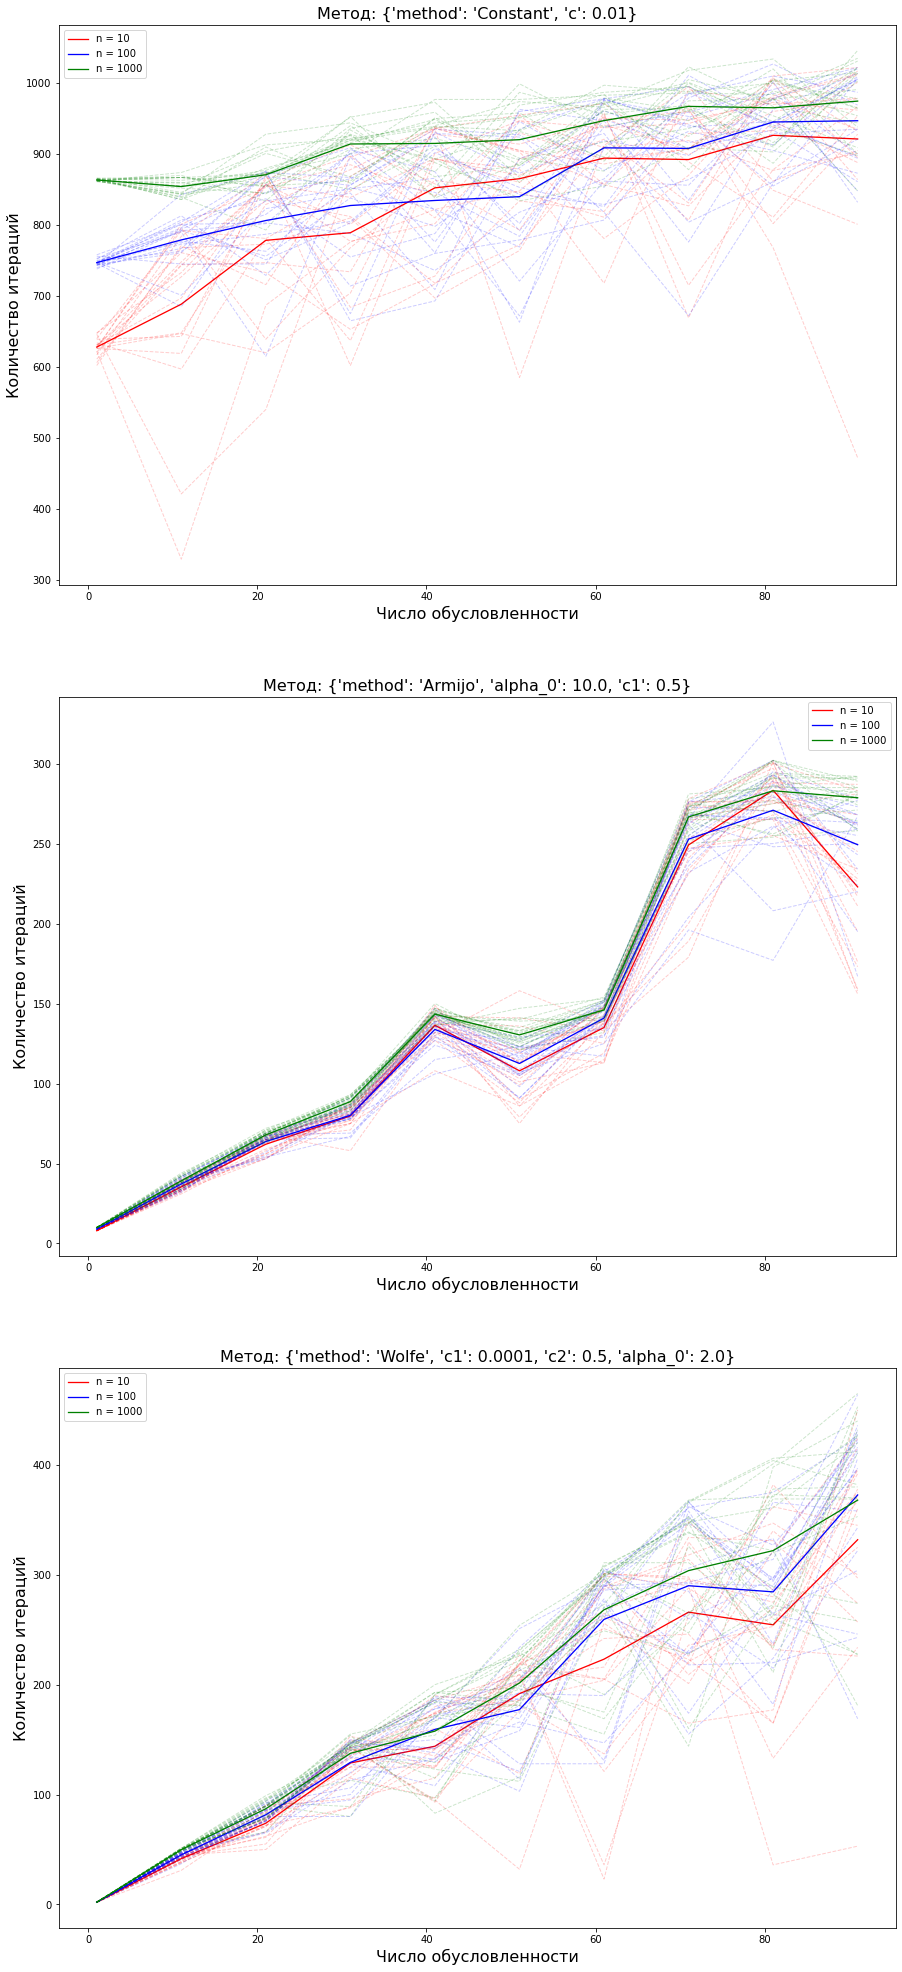

In [56]:
methods = [{'method': 'Constant', 'c': 0.01}, {'method': 'Armijo', 'alpha_0': 10.0, 'c1':0.5}, {"method":'Wolfe', 'c1':1e-4, 'c2':0.5, 'alpha_0':2.0}]
options = [(10, 'r', 'n = 10'), (100, 'b', 'n = 100'), (1000, 'g', 'n = 1000')]
k_vars = np.arange(1, 101, 10)

fig, ax = plt.subplots(3, 1, figsize=(15,35))

for j in range(len(methods)):
    for opt in options:
        T = np.zeros(len(k_vars))
        for i in range(20):
            t = []
            for k in k_vars:
                diag = np.random.uniform(1, k, opt[0])
                diag[0] = 1
                diag[-1] = k
                A, b = scipy.sparse.diags(diag), np.random.rand(opt[0]) * k
                oracle = oracles.QuadraticOracle(A, b)
                _, _, history = optimization.gradient_descent(oracle, np.zeros(opt[0]), line_search_options = methods[j], trace=True)
                t.append(len(history['grad_norm']))
            T = T + np.array(t)
            ax[j].plot(k_vars, t, opt[1] + '--', linewidth=1, alpha=0.2)
        ax[j].plot(k_vars, T/20, opt[1], label = opt[2], linewidth=1.3)
        ax[j].set_title('Метод: ' + str(methods[j]), fontsize = 16)
        ax[j].set_xlabel('Число обусловленности', fontsize = 16)
        ax[j].set_ylabel('Количество итераций', fontsize = 16)
        ax[j].legend()

### Выводы:
    
* Чем больше число обусловленности, тем больше количество итераций.

* Величина размерности не существенно влияет на количество итераций, как видно из графиков линии идут почти параллельно друг другу на соответствующих участках и "дельта" между линиями не сильно велика, за исключением, может быть, только константного метода.

### Эксперимент: Сравнение методов градиентного спуска и Ньютона на реальной задаче логистической регрессии

Сравнить методы градиентного спуска и Ньютона на задаче обучения логистической регрессии на реальных данных.

Для этого необходимо использовать три набора данных: w8a, gisette и
real-sim. Коэффициент регуляризации взять стандартным образом: $λ = \frac{1}{m}$.

Построить графики сходимости следующих двух видов:

1) Зависимость значения функции от реального временир работы метода.

2) Зависимость относительного квадрата нормы градиента $\frac{\vert\vert \nabla f(x_k) \vert\vert_2^2}{\vert\vert \nabla f(x_0) \vert\vert_2^2}$ (в логарифмической шкале) против реального времени работы.

Оба графика (градиентный спуск и Ньютон) необходимо нарисовать на одном графике.

In [79]:
def graph_compare(svm_file):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    A, b = load_svmlight_file(svm_file)
    lambda_ = 1 / len(b)
    oracle = oracles.create_log_reg_oracle(A, b, lambda_)
    
    _, _, history_gd = optimization.gradient_descent(oracle, np.zeros(A.shape[1]), trace=True)
    ax[0].plot(history_gd['time'], history_gd['func'], label='Градиентный спуск')

    _, _, history_n = optimization.newton(oracle, np.zeros(A.shape[1]), trace=True)
    ax[0].plot(history_n['time'], history_n['func'], label='Метод Ньютона')
    
    ax[0].set_xlabel('Реальное время работы метода')
    ax[0].set_ylabel('Значение функции')
    ax[0].legend()

    ax[1].plot(history_gd['time'], np.array(history_gd['grad_norm']) ** 2 / history_gd['grad_norm'][0] ** 2, label="Градиентный спуск")
    ax[1].plot(history_n['time'], np.array(history_n['grad_norm']) ** 2 / history_n['grad_norm'][0] ** 2, label="Метод Ньютона")
    
    ax[1].set_yscale('log')
    ax[1].set_xlabel('Реальное время работы метода')
    ax[1].set_ylabel('Относительный квадрат нормы градиента')
    ax[1].legend()

Набор w8a


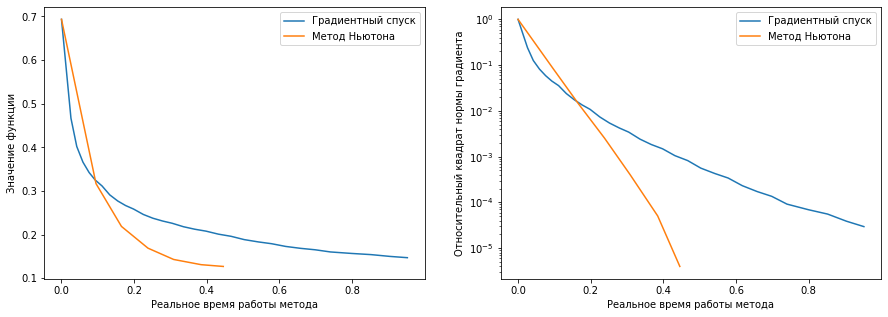

In [80]:
print('Набор w8a')
graph_compare('данные/w8a.txt')

C:\Users\1\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Набор gisette


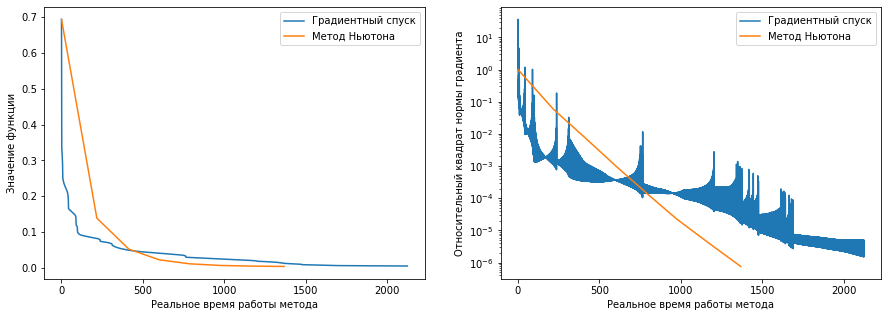

In [81]:
print('Набор gisette')
graph_compare('данные/gisette_scale.bz2')

In [83]:
# Компьютер зависает :(
# print('Набор real-sim')
# graph_compare('данные/real-sim.bz2')

### Вывод:

Метод градиентного спуска во всех случаях работает дольше метода Ньютона, хотя в начале работает, наоборот, быстрее. Для набора данных w8a графики получились более гладкими, чем для набора данных gisette, у которого заметен скачкообразный характер для зависимости относительного квадрата нормы градиента против реального времени работы.